In [7]:
import pandas as pd

In [8]:
#'./data/sample.csv' 파일 읽기
df=pd.read_csv('./data/cctv_in_seoul.csv')
df.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


### Copy

In [9]:
df1=df.copy()

### 새로운 열추가
> df['새로운 열이름']=값

In [10]:
# '2016년 증감값
df1['2016증감']=df1['2016년']-df1['2015년']
df1.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년,2016증감
0,강남구,3238,1292,430,584,932,348
1,강동구,1010,379,99,155,377,222
2,강북구,831,369,120,138,204,66
3,강서구,911,388,258,184,81,-103
4,관악구,2109,846,260,390,613,223


In [11]:
df1['증감']=['증가' if i >0 else '감소' for i in df1['2016증감']]

In [12]:
df1.describe()

,소계,2013년도 이전,2014년,2015년,2016년,2016증감
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000
mean,1515.320000,764.760000,159.480000,205.200000,385.880000,180.68000
std,616.774656,415.510257,104.132976,137.877059,182.479981,162.65447
min,825.000000,238.000000,21.000000,30.000000,81.000000,-156.00000
25%,1010.000000,464.000000,78.000000,103.000000,292.000000,66.00000
50%,1327.000000,573.000000,142.000000,184.000000,377.000000,210.00000
75%,1884.000000,1070.000000,218.000000,269.000000,467.000000,286.00000
max,3238.000000,1843.000000,430.000000,584.000000,932.000000,437.00000


In [13]:
import matplotlib.pyplot as plt
import os
import seaborn as sns
if os.name == 'nt':
    font_family = "Malgun Gothic"
else:
    font_family = "AppleGothic"
    
sns.set(font=font_family, rc={"axes.unicode_minus" : False })

In [14]:
# retina 를 지원하는 디스플레이에서 폰트가 선명하게 보이기 위함
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

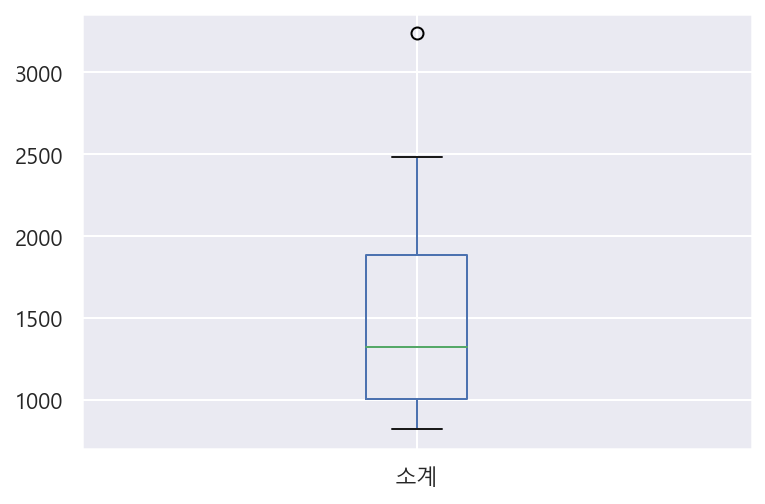

In [15]:
df1['소계'].plot(kind='box');

In [16]:
df1['구간']=['상' if i>2000 else '중' if i> 1500 else '하' for i in df1['소계']]

In [17]:
df1.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년,2016증감,증감,구간
0,강남구,3238,1292,430,584,932,348,증가,상
1,강동구,1010,379,99,155,377,222,증가,하
2,강북구,831,369,120,138,204,66,증가,하
3,강서구,911,388,258,184,81,-103,감소,하
4,관악구,2109,846,260,390,613,223,증가,상


### 행, 열 삭제
> - df.drop(행번호, axis=0)
> - df.drop(열이름, axis=1)


In [18]:
df1.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년,2016증감,증감,구간
0,강남구,3238,1292,430,584,932,348,증가,상
1,강동구,1010,379,99,155,377,222,증가,하
2,강북구,831,369,120,138,204,66,증가,하
3,강서구,911,388,258,184,81,-103,감소,하
4,관악구,2109,846,260,390,613,223,증가,상


In [19]:
# 2행 삭제
df1.drop(2)

,기관명,소계,2013년도 이전,2014년,2015년,2016년,2016증감,증감,구간
0,강남구,3238,1292,430,584,932,348,증가,상
1,강동구,1010,379,99,155,377,222,증가,하
3,강서구,911,388,258,184,81,-103,감소,하
4,관악구,2109,846,260,390,613,223,증가,상
5,광진구,878,573,78,53,174,121,증가,하
6,구로구,1884,1142,173,246,323,77,증가,중
7,금천구,1348,674,51,269,354,85,증가,하
8,노원구,1566,542,57,451,516,65,증가,중
9,도봉구,825,238,159,42,386,344,증가,하
10,동대문구,1870,1070,23,198,579,381,증가,중


In [20]:
# '소계', '2016년'열 삭제
df1.drop(['소계','2016년'], axis=1, inplace=True)


## 데이터프레임간 산술 연산 

In [21]:
df2=pd.read_csv('./data/sample1.csv', encoding='cp949')
df2.head()

,번호,이름,국어,영어,비고
0,1,aa,70,68,NaN
1,2,bb,85,88,NaN
2,3,cc,96,92,성적우수자
3,4,dd,48,37,재수강
4,5,ee,85,79,NaN


## 1. Column 과 Column 간 연산 (+, -, *, /, %)

In [22]:
df2['총점']=df2['국어']+df2['영어']
df2.head()

,번호,이름,국어,영어,비고,총점
0,1,aa,70,68,NaN,138
1,2,bb,85,88,NaN,173
2,3,cc,96,92,성적우수자,188
3,4,dd,48,37,재수강,85
4,5,ee,85,79,NaN,164


In [23]:
df2['국어']-df2['영어']

0     2
1    -3
2     4
3    11
4     6
5     0
6     2
7    -7
dtype: int64

## 2. mean(), sum(), max(), min(), count()을 axis 기준으로 연산

In [24]:
df2.head()

,번호,이름,국어,영어,비고,총점
0,1,aa,70,68,NaN,138
1,2,bb,85,88,NaN,173
2,3,cc,96,92,성적우수자,188
3,4,dd,48,37,재수강,85
4,5,ee,85,79,NaN,164


In [25]:
df2[['국어','영어']].mean(axis=0)

국어    75.125
영어    73.250
dtype: float64

### 분위수 구하는 quantile()함수

In [26]:
# 분위수 구하는 
df2['국어'].quantile(0.9)

90.4

In [27]:
#과목별 상위 10%인 학생 검색
con1=df2['국어']>=df2['국어'].quantile(0.9)
con2=df2['영어']>=df2['영어'].quantile(0.9)

display(df2[con1])
display(df2[con2])


,번호,이름,국어,영어,비고,총점
2,3,cc,96,92,성적우수자,188


,번호,이름,국어,영어,비고,총점
2,3,cc,96,92,성적우수자,188


In [28]:
#국어 성적 사분위 수 후 하기 
mn,c,mx= df2['국어'].quantile([0.25,0.5, 0.75])

print(mn,c,mx)

#이상치 구하기
IRQ=mx-mn
max_outlier=mx+(1.5*IRQ)
min_outlier=mn-(1.5*IRQ)

print(f'{max_outlier:8.2f} 값보다 크면 이상치로 처리됨')
print(f'{min_outlier: 8.2f} 값보다 작으면 이상치로 처리됨')

#이상치 데이터 확인
display(df2[df2['국어']> max_outlier])
display(df2[df2['국어']< min_outlier])



66.75 78.5 85.75
  114.25 값보다 크면 이상치로 처리됨
   38.25 값보다 작으면 이상치로 처리됨


,번호,이름,국어,영어,비고,총점


,번호,이름,국어,영어,비고,총점


In [29]:
#---------------

## Groupby
dataframe을 key값에 따라 나눈 뒤 각각에 특정한 함수를 적용한 뒤 다시 합치고 싶을때 사용합니다.

groupby는 Split-Apply-Combine 단계를 거칩니다.

- **Split**: Key값에 따라 나눈 뒤
- **Apply**: 함수를 적용
- **Combine**: 다시 합치기

### 형식  df.groupy('열이름'),함수()
> 함수 : sum(), count(),min(),max(),mean(),meadian()


SQL의 **GROUP BY**와 유사합니다.
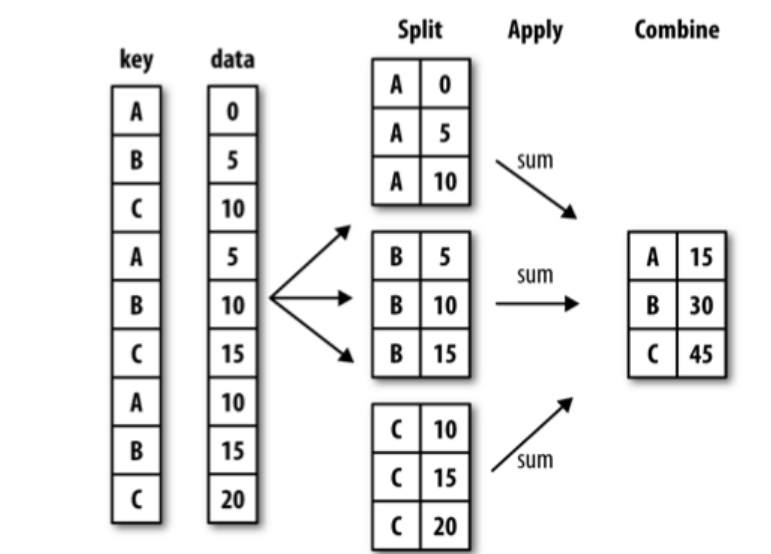

In [208]:
df1.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년,2016증감,증감,구간
0,강남구,3238,1292,430,584,932,348,증가,상
1,강동구,1010,379,99,155,377,222,증가,하
2,강북구,831,369,120,138,204,66,증가,하
3,강서구,911,388,258,184,81,-103,감소,하
4,관악구,2109,846,260,390,613,223,증가,상


In [214]:
df1.groupby('구간').max()

,기관명,소계,2013년도 이전,2014년,2015년,2016년,2016증감,증감
구간,,,,,,,,
상,은평구,3238,1843,430,584,932,437,증가
중,종로구,1884,1142,314,451,630,419,증가
하,중랑구,1348,844,341,269,463,395,증가


In [215]:
df1.groupby('구간').max()

,기관명,소계,2013년도 이전,2014년,2015년,2016년,2016증감,증감
구간,,,,,,,,
상,은평구,3238,1843,430,584,932,437,증가
중,종로구,1884,1142,314,451,630,419,증가
하,중랑구,1348,844,341,269,463,395,증가


In [219]:
df1.groupby(['구간','증감']).mean()

소계  2013년도 이전       2014년       2015년       2016년      2016증감
구간 증감                                                                        
상  증가  2388.333333     1315.5  238.500000  288.333333  546.000000  257.666667
중  감소  1651.000000     1009.0   78.000000  360.000000  204.000000 -156.000000
   증가  1734.750000      804.5  141.750000  276.500000  512.000000  235.500000
하  감소   913.500000      448.5  189.500000  180.500000   95.000000  -85.500000
   증가  1094.666667      508.5  127.666667  131.083333  327.416667  196.333333

## matplotlib 시각화

In [246]:
import matplotlib.pyplot as plt
#plt.rcParams['font.family'] = 'Malgun Gothic'#한글 깨짐 해결
#plt.rcParams['axes.unicode_minus'] = False  #- 깨짐 해결

<function matplotlib.pyplot.show(close=None, block=None)>

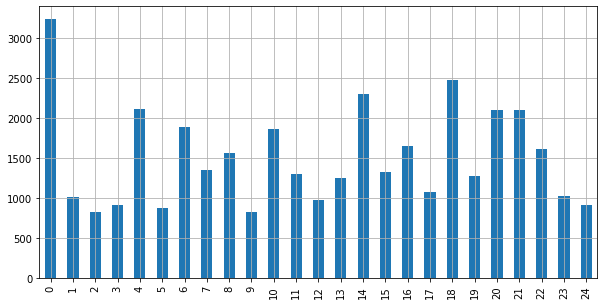

In [240]:
df1['소계'].plot(kind='bar', grid=True, figsize=(10, 5))

plt.show

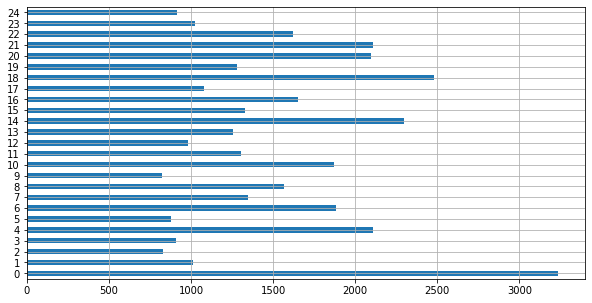

In [241]:
df1['소계'].plot(kind='barh', grid=True, figsize=(10, 5))
plt.show()

In [243]:
df1=df1.set_index('기관명')
df1.head()

,소계,2013년도 이전,2014년,2015년,2016년,2016증감,증감,구간
기관명,,,,,,,,
강남구,3238,1292,430,584,932,348,증가,상
강동구,1010,379,99,155,377,222,증가,하
강북구,831,369,120,138,204,66,증가,하
강서구,911,388,258,184,81,-103,감소,하
관악구,2109,846,260,390,613,223,증가,상


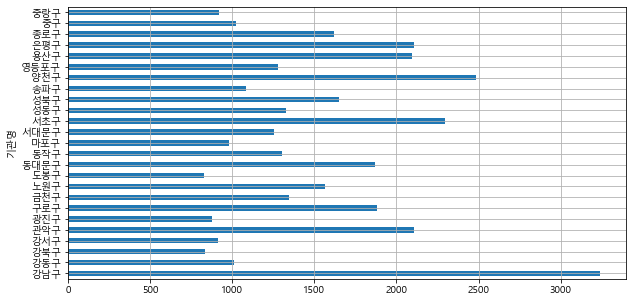

In [247]:
df1['소계'].plot(kind='barh', grid=True, figsize=(10, 5))
plt.show()

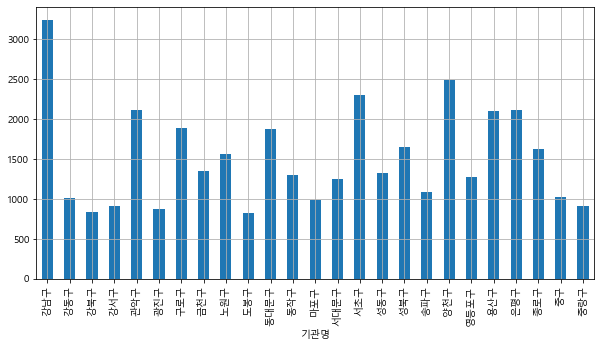

In [248]:
df1['소계'].plot(kind='bar', grid=True, figsize=(10, 5))
plt.show()

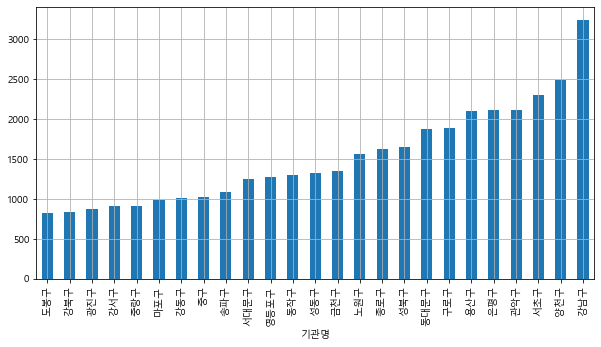

In [249]:
df1['소계'].sort_values().plot(kind='bar', grid=True, figsize=(10, 5))
plt.show()

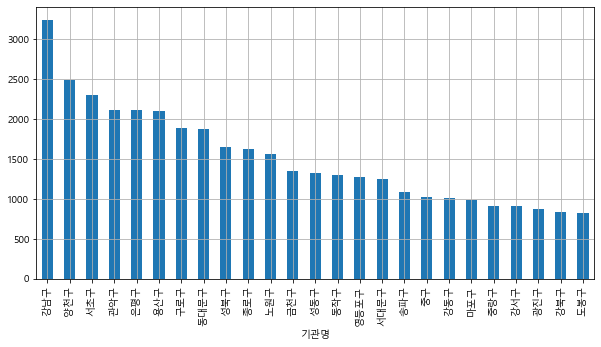

In [250]:
df1['소계'].sort_values(ascending=False).plot(kind='bar', grid=True, 
                                               figsize=(10, 5))
plt.show()

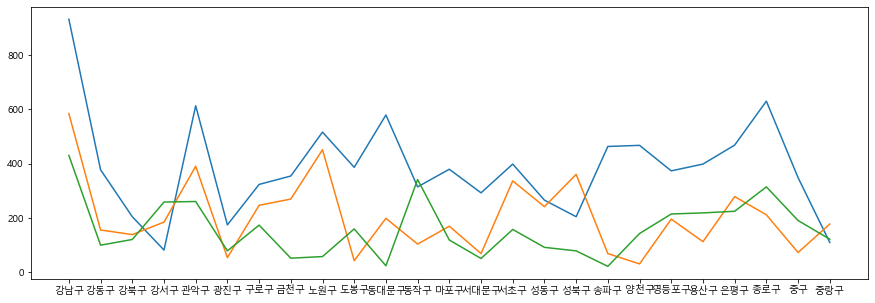

In [255]:
plt.figure(figsize=(15, 5))
plt.plot(df1['2016년'])
plt.plot(df1['2015년'])
plt.plot(df1['2014년'])
plt.show()

In [256]:
df1.head()

,소계,2013년도 이전,2014년,2015년,2016년,2016증감,증감,구간
기관명,,,,,,,,
강남구,3238,1292,430,584,932,348,증가,상
강동구,1010,379,99,155,377,222,증가,하
강북구,831,369,120,138,204,66,증가,하
강서구,911,388,258,184,81,-103,감소,하
관악구,2109,846,260,390,613,223,증가,상


<AxesSubplot:xlabel='기관명'>

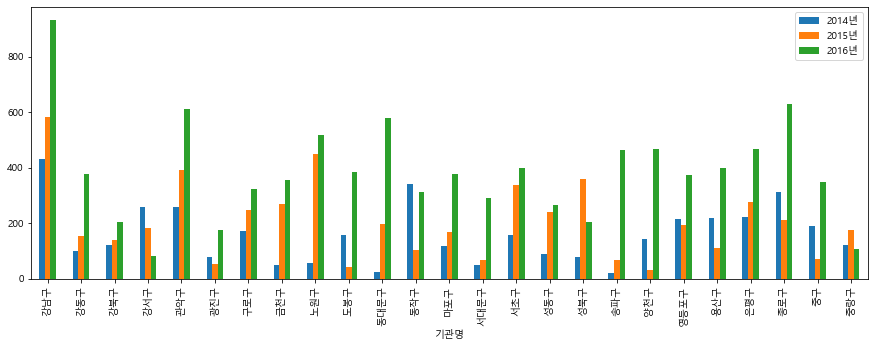

In [265]:

df1.loc[:,'2014년':'2016년'].plot(kind='bar',figsize=(15,5))

In [266]:
df1.head()

,소계,2013년도 이전,2014년,2015년,2016년,2016증감,증감,구간
기관명,,,,,,,,
강남구,3238,1292,430,584,932,348,증가,상
강동구,1010,379,99,155,377,222,증가,하
강북구,831,369,120,138,204,66,증가,하
강서구,911,388,258,184,81,-103,감소,하
관악구,2109,846,260,390,613,223,증가,상


In [295]:
def chart_pi(분류,열):
    tmp=df1.groupby(분류)[열].mean()
    tmp.plot(kind='pie')

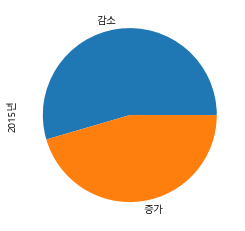

In [300]:
chart_pi('증감','2015년')